In [31]:
dir = "Malicious URLs.csv"

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [33]:
data = pd.read_csv(dir)
test_url = data['URLs'][1]

In [34]:
data.head()

,URLs,Class
0,freebase.com/view/en/bob_sirois,good
1,en.wikipedia.org/wiki/Joie_Lee,good
2,pipl.com/directory/people/Rejean/Beaudin,good
3,flickr.com/photos/teneyck/sets/72157610336209297/,good
4,ussoccer.com/News/Federation-Services/2009/06/...,good


In [35]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=20)
labels = train_df['Class']
test_labels = test_df['Class']

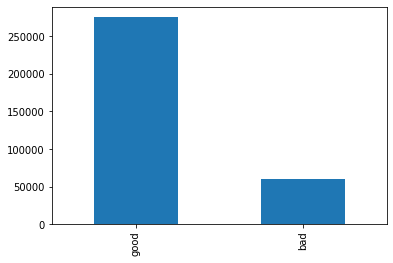

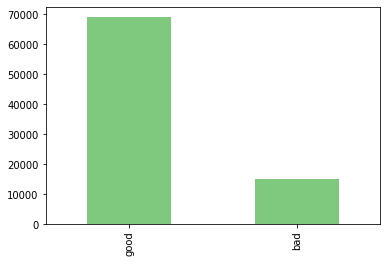

In [36]:
count_train_cl = pd.value_counts(train_df['Class'])
count_train_cl.plot(kind='bar', fontsize=10)
plt.show()

count_test_cl = pd.value_counts(test_df['Class'])
count_test_cl.plot(kind='bar', fontsize=10, colormap='Accent')
plt.show()


In [37]:
def tokenizer(url):
  tokens = re.split('[/-]', url)
  for i in tokens:
    if i.find(".") >=0:
      dot_split = i.split('.')
      if "com" in dot_split:
        dot_split.remove("com")
      if "www" in dot_split:
        dot_split.remove("www")
      tokens += dot_split
  return tokens        

In [38]:
tokenized_url = tokenizer(test_url)

In [39]:
print(tokenized_url)

['en.wikipedia.org', 'wiki', 'Joie_Lee', 'en', 'wikipedia', 'org']


In [40]:
#vectorizer
#count vectorizer
cv = CountVectorizer(tokenizer=tokenizer)
count_X = cv.fit_transform(train_df['URLs'])

#tf-idf vectorizer
tv = TfidfVectorizer(tokenizer=tokenizer)
tfidf_X = tv.fit_transform(train_df['URLs'])

#vectorizing done

In [41]:
test_count_X = cv.transform(test_df['URLs'])
test_tfidf_X = tv.transform(test_df['URLs'])

#vectorizing the test data

In [42]:
def generate_report(cmatrix, score, creport):

  
  
  cmatrix = cmatrix.T
  
  # Generate confusion matrix heatmap
  plt.figure(figsize=(5,5))
  sns.heatmap(cmatrix, 
              annot=True, 
              fmt="d", 
              linewidths=.5, 
              square = True, 
              cmap = 'Blues', 
              annot_kws={"size": 16}, 
              xticklabels=['bad', 'good'],
              yticklabels=['bad', 'good'])

  plt.xticks(rotation='horizontal', fontsize=16)
  plt.yticks(rotation='horizontal', fontsize=16)
  plt.xlabel('Actual Label', size=20);
  plt.ylabel('Predicted Label', size=20);

  title = 'Accuracy Score: {0:.4f}'.format(score)
  plt.title(title, size = 20);

  # Display classification report and confusion matrix
  print(creport)
  plt.show()
  

NOTE, YOU CAN DEPLOY ANY OF THE MODEL,
JUST TRY TO INCREASE ACCURACY OF ANY OF THE MODEL

              precision    recall  f1-score   support

         bad       0.97      0.90      0.93     15085
        good       0.98      0.99      0.99     69008

    accuracy                           0.98     84093
   macro avg       0.98      0.95      0.96     84093
weighted avg       0.98      0.98      0.98     84093



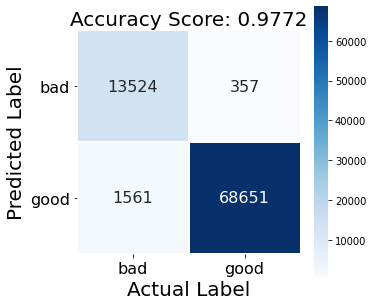

In [43]:
#training the model with Multinomial Naive Bayesian with Count Vectorizer
mnb_count = MultinomialNB()
mnb_count.fit(count_X, labels)

score_mnb_count = mnb_count.score(test_count_X, test_labels)
predictions_mnb_count = mnb_count.predict(test_count_X)
cmatrix_mnb_count = confusion_matrix(test_labels, predictions_mnb_count)
creport_mnb_count = classification_report(test_labels, predictions_mnb_count)
generate_report(cmatrix_mnb_count, score_mnb_count, creport_mnb_count)


the url predicted seems to be  ['bad']


              precision    recall  f1-score   support

         bad       0.99      0.83      0.90     15085
        good       0.96      1.00      0.98     69008

    accuracy                           0.97     84093
   macro avg       0.98      0.91      0.94     84093
weighted avg       0.97      0.97      0.97     84093



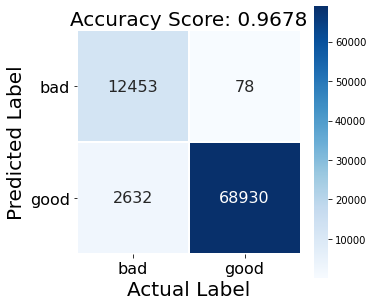

In [53]:
#training the model with Multinomial Naive Bayesian with tfidf
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(tfidf_X, labels)

score_mnb_tfidf = mnb_tfidf.score(test_tfidf_X, test_labels)
predictions_mnb_tfidf = mnb_tfidf.predict(test_tfidf_X)
cmatrix_mnb_tfidf = confusion_matrix(test_labels, predictions_mnb_tfidf)
creport_mnb_tfidf = classification_report(test_labels, predictions_mnb_tfidf)
generate_report(cmatrix_mnb_tfidf, score_mnb_tfidf, creport_mnb_tfidf)

In [72]:
input_url = ["www.namecheck.com/phishing-check/"]

predic_test = cv.transform(input_url)
predic_test_tfidf = tv.transform(input_url)
y = mnb_count.predict(predic_test)

print("the url predicted seems to be ",y)
z = mnb_tfidf.predict(predic_test_tfidf)
print("the url predicted seems to be ",z)

the url predicted seems to be  ['good']
the url predicted seems to be  ['good']
